In [3]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
from cmcrameri import cm
from matplotlib import colors
import matplotlib.patches as patches
from scipy import signal
import peakutils
import math
import json
from os.path import expanduser
import pickle

In [4]:
experiment_name = 'P3856'
run_name = 'P3856_YHE211_1_Slot1-1_1_5104'
EXPERIMENT_DIR = '/media/big-ssd/experiments/{}'.format(experiment_name)
FEATURES_3DID_DIR = '/media/big-ssd/results-P3856-3did/minvi-P3856-3000/features-3did'
FEATURES_3DID_FILE = '{}/exp-{}-run-{}-features-3did-dedup.pkl'.format(FEATURES_3DID_DIR, experiment_name, run_name)

In [5]:
# load the features detected by 3DID
with open(FEATURES_3DID_FILE, 'rb') as handle:
    d = pickle.load(handle)
features_3did_df = d['features_df']

In [7]:
features_3did_df['log_feature_intensity'] = np.log10(features_3did_df.feature_intensity)

#### identifiability versus intensity

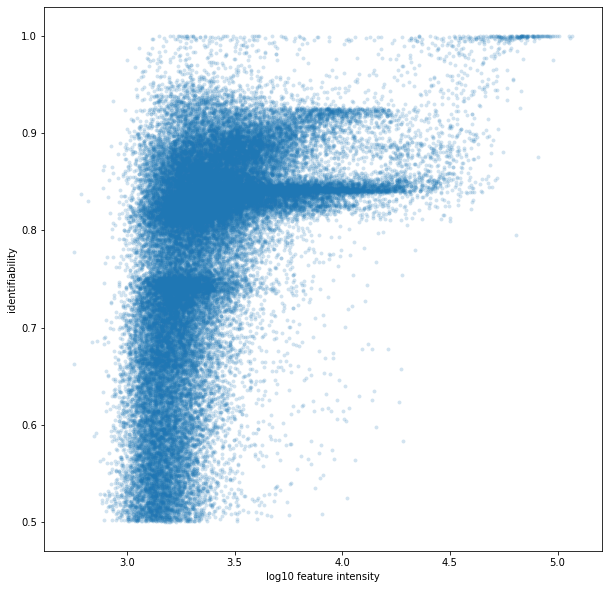

In [27]:
f, ax = plt.subplots()
f.set_figheight(10)
f.set_figwidth(10)

plt.margins(0.06)
# plt.title('deconvolution score for features identified by PASEF-seeded and features detected by 3DID methods')

ax.scatter(features_3did_df.log_feature_intensity, features_3did_df.prediction, marker='o', lw=0, s=15, alpha=0.2)

# plt.xlim((-1,8000))
# plt.ylim((-1,8000))

plt.xlabel('log10 feature intensity')
plt.ylabel('identifiability')

plt.show()

#### coelution coefficient versus intensity

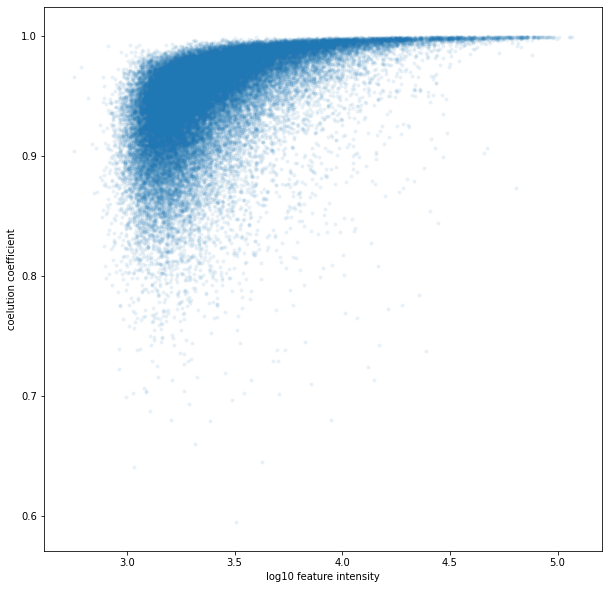

In [17]:
f, ax = plt.subplots()
f.set_figheight(10)
f.set_figwidth(10)

plt.margins(0.06)
# plt.title('deconvolution score for features identified by PASEF-seeded and features detected by 3DID methods')

ax.scatter(features_3did_df.log_feature_intensity, features_3did_df.coelution_coefficient, marker='o', lw=0, s=15, alpha=0.1)

# plt.xlim((-1,8000))
# plt.ylim((-1,8000))

plt.xlabel('log10 feature intensity')
plt.ylabel('coelution coefficient')

plt.show()

#### mobility coefficient versus intensity

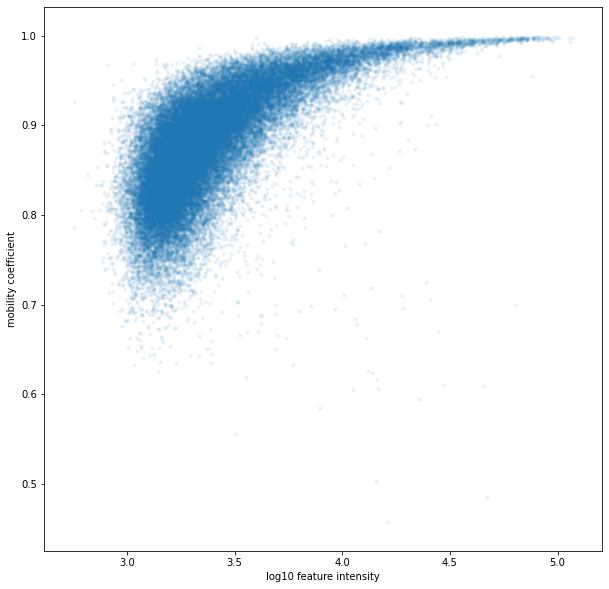

In [16]:
f, ax = plt.subplots()
f.set_figheight(10)
f.set_figwidth(10)

plt.margins(0.06)
# plt.title('deconvolution score for features identified by PASEF-seeded and features detected by 3DID methods')

ax.scatter(features_3did_df.log_feature_intensity, features_3did_df.mobility_coefficient, marker='o', lw=0, s=15, alpha=0.1)

# plt.xlim((-1,8000))
# plt.ylim((-1,8000))

plt.xlabel('log10 feature intensity')
plt.ylabel('mobility coefficient')

plt.show()

#### R-squared of the monoisotopic peak in retention time versus intensity

In [21]:
rt_r_squared_df = features_3did_df[(features_3did_df.rt_r_squared > 0)]

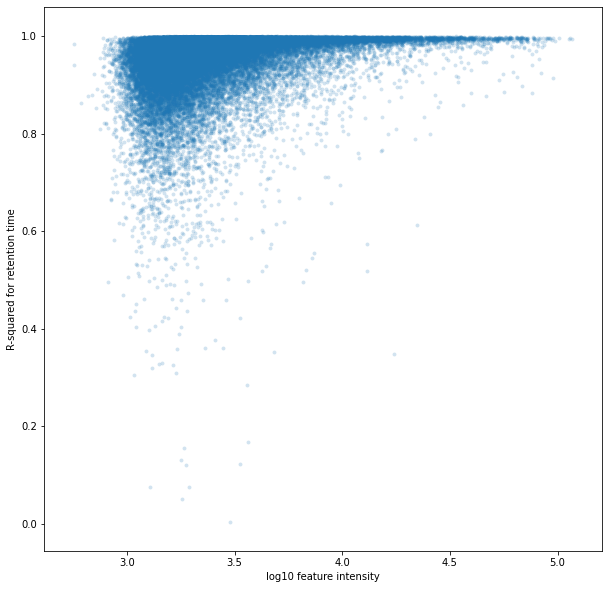

In [26]:
f, ax = plt.subplots()
f.set_figheight(10)
f.set_figwidth(10)

plt.margins(0.06)
# plt.title('deconvolution score for features identified by PASEF-seeded and features detected by 3DID methods')

ax.scatter(rt_r_squared_df.log_feature_intensity, rt_r_squared_df.rt_r_squared, marker='o', lw=0, s=15, alpha=0.2)

# plt.xlim((-1,8000))
# plt.ylim((-1,8000))

plt.xlabel('log10 feature intensity')
plt.ylabel('R-squared for retention time')

plt.show()

#### R-squared of the monoisotopic peak in mobility versus intensity

In [23]:
scan_r_squared_df = features_3did_df[(features_3did_df.scan_r_squared > 0)]

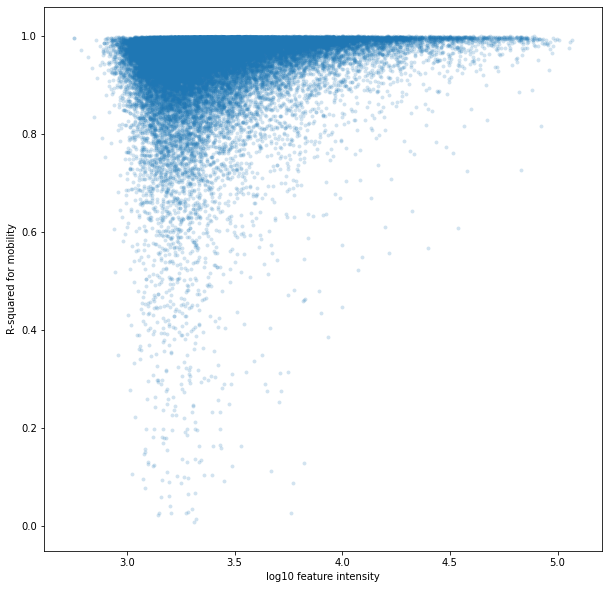

In [25]:
f, ax = plt.subplots()
f.set_figheight(10)
f.set_figwidth(10)

plt.margins(0.06)
# plt.title('deconvolution score for features identified by PASEF-seeded and features detected by 3DID methods')

ax.scatter(scan_r_squared_df.log_feature_intensity, scan_r_squared_df.scan_r_squared, marker='o', lw=0, s=15, alpha=0.2)

# plt.xlim((-1,8000))
# plt.ylim((-1,8000))

plt.xlabel('log10 feature intensity')
plt.ylabel('R-squared for mobility')

plt.show()

#### deconvolution score versus intensity

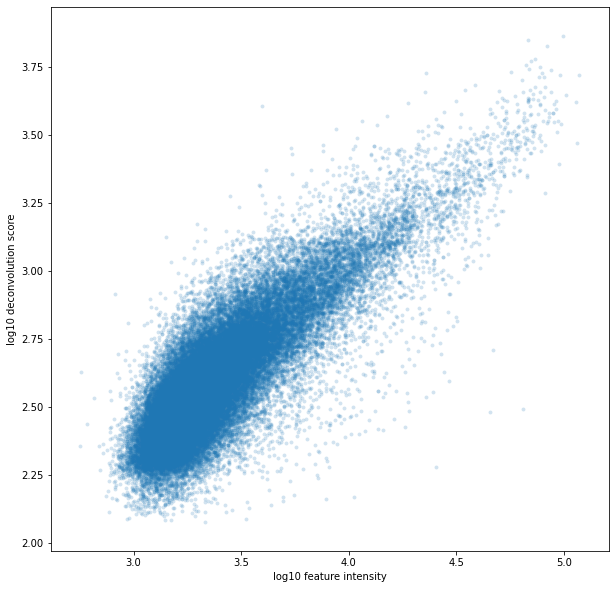

In [30]:
f, ax = plt.subplots()
f.set_figheight(10)
f.set_figwidth(10)

plt.margins(0.06)
# plt.title('deconvolution score for features identified by PASEF-seeded and features detected by 3DID methods')

ax.scatter(features_3did_df.log_feature_intensity, np.log10(features_3did_df.deconvolution_score), marker='o', lw=0, s=15, alpha=0.2)

# plt.xlim((-1,8000))
# plt.ylim((-1,8000))

plt.xlabel('log10 feature intensity')
plt.ylabel('log10 deconvolution score')

plt.show()